# Name: Chandrahas Reddy
# RegNo: 124156074

In [16]:
# 1

import pandas as pd
data = pd.read_csv("daily_min_temp.csv", on_bad_lines='skip')

In [17]:
data.head()

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [19]:
df = pd.DataFrame(data)

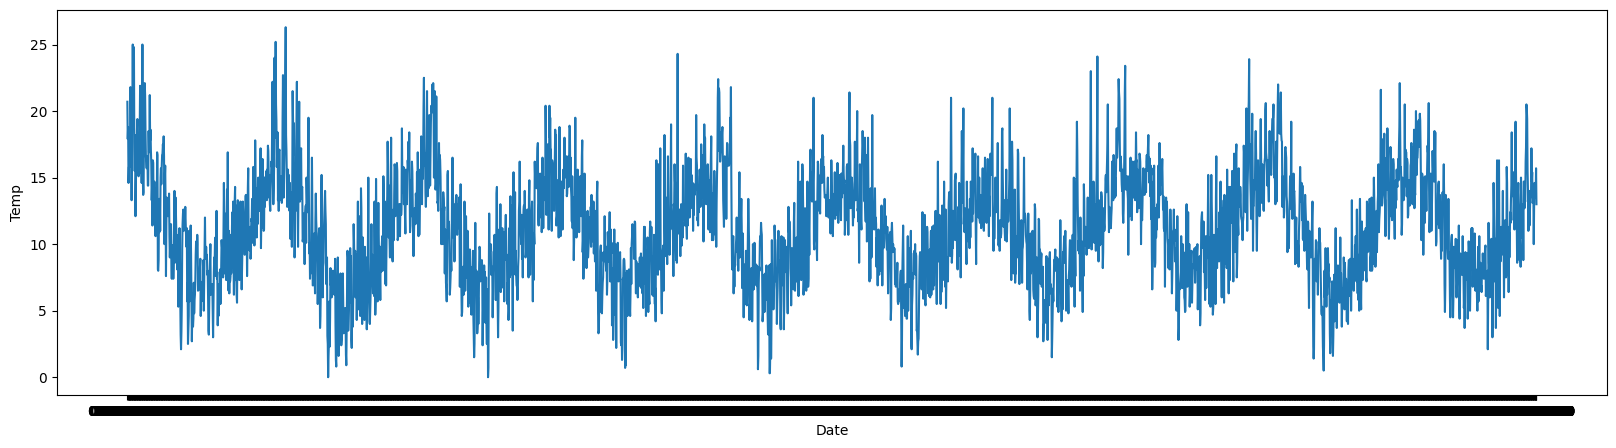

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
x = df["Date"]
y = df["Temp"]
plt.xlabel("Date")
plt.ylabel("Temp")
plt.plot(x,y)
plt.show()

In [1]:
# 2

import pandas as pd
series = pd.read_csv('daily_min_temp.csv', header=0, index_col=0)
temps = pd.DataFrame(series.values)
dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t-1', 't']
print(dataframe.head(5))

    t-1     t
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [2]:
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't']
print(dataframe.head)

<bound method NDFrame.head of        t-3   t-2   t-1     t
0      NaN   NaN   NaN  20.7
1      NaN   NaN  20.7  17.9
2      NaN  20.7  17.9  18.8
3     20.7  17.9  18.8  14.6
4     17.9  18.8  14.6  15.8
...    ...   ...   ...   ...
3645  10.0  12.9  14.6  14.0
3646  12.9  14.6  14.0  13.6
3647  14.6  14.0  13.6  13.5
3648  14.0  13.6  13.5  15.7
3649  13.6  13.5  15.7  13.0

[3650 rows x 4 columns]>


In [23]:
# 3

import pandas as pd

series = pd.read_csv('daily_min_temp.csv', header=0, index_col=0)
temps = pd.DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't']
print(dataframe.head(5))

   mean(t-2,t-1)     t
0            NaN  20.7
1            NaN  17.9
2          19.30  18.8
3          18.35  14.6
4          16.70  15.8


In [24]:
import pandas as pd
series = pd.read_csv('daily_min_temp.csv', header=0, index_col=0)
temps = pd.DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't']
print(dataframe.head(5))

    min       mean   max     t
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


In [25]:
import pandas as pd
series = pd.read_csv('daily_min_temp.csv', header=0, index_col=0)
temps = pd.DataFrame(series.values)
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't']
print(dataframe.head(5))

    min       mean   max     t
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


In [26]:
# convert to datetime
df["Date"] = pd.to_datetime(df["Date"])
# get the day of week
df["DayOfWeek"] = df["Date"].dt.weekday
# display the dataframe
print(df)

print("---------------------------------------------")
print("Weekend Details")
# check if the date is weekend or not
df["IsWeekend"] = df["DayOfWeek"] >= 5
# display the dataframe
print(df)

           Date  Temp  DayOfWeek
0    1981-01-01  20.7          3
1    1981-02-01  17.9          6
2    1981-03-01  18.8          6
3    1981-04-01  14.6          2
4    1981-05-01  15.8          4
...         ...   ...        ...
3645 1990-12-27  14.0          3
3646 1990-12-28  13.6          4
3647 1990-12-29  13.5          5
3648 1990-12-30  15.7          6
3649 1990-12-31  13.0          0

[3650 rows x 3 columns]
---------------------------------------------
Weekend Details
           Date  Temp  DayOfWeek  IsWeekend
0    1981-01-01  20.7          3      False
1    1981-02-01  17.9          6       True
2    1981-03-01  18.8          6       True
3    1981-04-01  14.6          2      False
4    1981-05-01  15.8          4      False
...         ...   ...        ...        ...
3645 1990-12-27  14.0          3      False
3646 1990-12-28  13.6          4      False
3647 1990-12-29  13.5          5       True
3648 1990-12-30  15.7          6       True
3649 1990-12-31  13.0          0 

C:\Users\chand\AppData\Local\Temp\ipykernel_9996\4268907808.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


In [27]:
# Business Quarter

import pandas as pd
df = pd.DataFrame(data)
df['Quarter'] = pd.PeriodIndex(df['Date'], freq='Q-MAR').strftime('Q%q')
print(df)

           Date  Temp  DayOfWeek  IsWeekend Quarter
0    1981-01-01  20.7          3      False      Q4
1    1981-02-01  17.9          6       True      Q4
2    1981-03-01  18.8          6       True      Q4
3    1981-04-01  14.6          2      False      Q1
4    1981-05-01  15.8          4      False      Q1
...         ...   ...        ...        ...     ...
3645 1990-12-27  14.0          3      False      Q3
3646 1990-12-28  13.6          4      False      Q3
3647 1990-12-29  13.5          5       True      Q3
3648 1990-12-30  15.7          6       True      Q3
3649 1990-12-31  13.0          0      False      Q3

[3650 rows x 5 columns]


In [28]:
# Public Holiday

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())
df['holiday'] = df['Date'].isin(holidays)
df.head()

,Date,Temp,DayOfWeek,IsWeekend,Quarter,holiday
0,1981-01-01,20.7,3,False,Q4,True
1,1981-02-01,17.9,6,True,Q4,False
2,1981-03-01,18.8,6,True,Q4,False
3,1981-04-01,14.6,2,False,Q1,False
4,1981-05-01,15.8,4,False,Q1,False


In [29]:
# Season of the year

s = pd.Series(pd.date_range(start='1981-01', freq='d', periods=3650))
s.dt.month_name()

0        January
1        January
2        January
3        January
4        January
          ...   
3645    December
3646    December
3647    December
3648    December
3649    December
Length: 3650, dtype: object